In [45]:
import torch
import sklearn

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [47]:
from sklearn.preprocessing import StandardScaler


In [67]:
#import sklearn.datasets import load_boston ## not vaild from 1.2 version of sklearn 
from tensorflow.keras.datasets import boston_housing # we can get data from keras instead

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [68]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
x = pd.concat([x_train, x_test])
y = np.append( y_train, y_test)

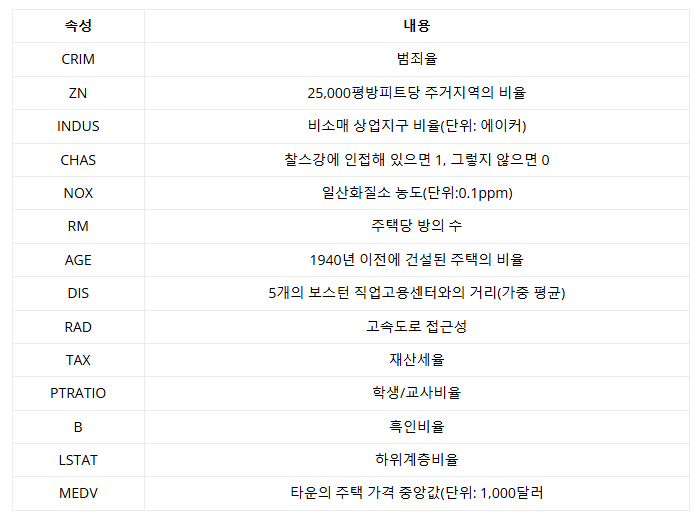

In [69]:
# Scaling 

scaler = StandardScaler()
scaler.fit(x.values)


StandardScaler()

In [70]:
x.values[:, :] = scaler.transform(x.values[:, :])

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



In [72]:
x = torch.from_numpy(x.values).float()
x.shape

torch.Size([506, 13])

In [73]:
y = torch.from_numpy(y).float()
y.shape


torch.Size([506])

In [74]:
y = y.reshape([506, 1])
y.shape

torch.Size([506, 1])

In [75]:
n_epochs = 100000
learning_rate = 1e-4
print_interval = 5000

In [76]:
relu = nn.ReLU()
leaky_relu = nn.LeakyReLU(0.1)

In [77]:

class myModel(nn.Module):

    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim

        super().__init__()

        self.linear1 = nn.Linear(input_dim, 3)
        self.linear2 = nn.Linear(3, 3)
        self.linear3 = nn.Linear(3, output_dim)

        self.act = nn.ReLU()


    def forward(self, x):
        # size of x = (batchsize , input_dim)

        h = self.act( self.linear1(x))
        h = self.act( self.linear2(h))
        y = self.linear3(h)

        return y

        # no activation for last output (-~+) 
        #size of y = (batch size, output_dim)



In [78]:
model = myModel( x.size(-1), y.size(-1))
model

myModel(
  (linear1): Linear(in_features=13, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=1, bias=True)
  (act): ReLU()
)

In [60]:
# ## Alt method 
# model = nn.Sequential(
#         nn.Linear(x.size(-1), 3),
#         nn.LeakyReLU(),
#         nn.Linear(3,3),
#         nn.LeakyReLU(),
#         nn.Linear(3,y.size(-1)),    
#     )
# model

Sequential(
  (0): Linear(in_features=13, out_features=3, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=3, out_features=1, bias=True)
)

In [79]:
optimizer = optim.SGD( model.parameters(), lr = learning_rate)

In [80]:
y_hat = model(x)

In [81]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i+1) % print_interval == 0 :
        print( 'EPOCH %d : loss = %.4e' % (i+1, loss))

EPOCH 5000 : loss = 1.3860e+01
EPOCH 10000 : loss = 1.2492e+01
EPOCH 15000 : loss = 1.1500e+01
EPOCH 20000 : loss = 1.0340e+01
EPOCH 25000 : loss = 9.5588e+00
EPOCH 30000 : loss = 9.0699e+00
EPOCH 35000 : loss = 8.7671e+00
EPOCH 40000 : loss = 8.6345e+00
EPOCH 45000 : loss = 8.5385e+00
EPOCH 50000 : loss = 8.4289e+00
EPOCH 55000 : loss = 8.3160e+00
EPOCH 60000 : loss = 8.2565e+00
EPOCH 65000 : loss = 8.2252e+00
EPOCH 70000 : loss = 8.2084e+00
EPOCH 75000 : loss = 8.1982e+00
EPOCH 80000 : loss = 8.1923e+00
EPOCH 85000 : loss = 8.1887e+00
EPOCH 90000 : loss = 8.1509e+00
EPOCH 95000 : loss = 8.1097e+00
EPOCH 100000 : loss = 8.0880e+00


In [82]:
y_hat = model(x)

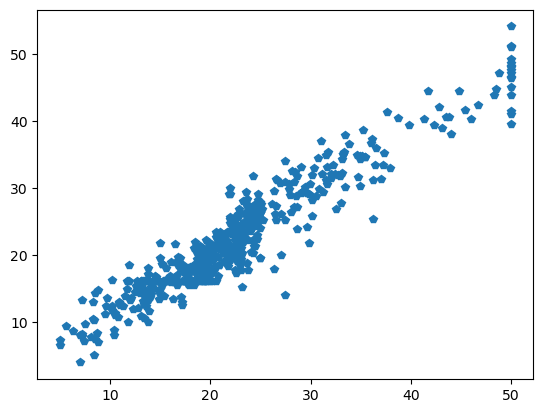

In [85]:
plt.plot(y, y_hat.detach().numpy(), "p")

In [ ]:
import sklearn.datasets


sklearn.datasets.load_bo

How about wine?

In [21]:

data = sklearn.datasets.load_wine(as_frame=True)
df = data.frame
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [22]:
df.shape

(178, 14)